In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('data/dados_sensores_challenge.csv')

# Análise de Dados

In [22]:
df.head()

,id,temperatura,umidade,vibracao,status
0,691,35.4,82.5,2.0212,NORMAL
1,690,35.4,82.5,2.0212,NORMAL
2,689,35.4,82.5,2.0212,NORMAL
3,688,35.4,82.5,2.0212,NORMAL
4,687,35.4,82.5,2.0212,NORMAL


In [21]:
df.describe()

,id,temperatura,umidade,vibracao
count,691.000000,691.000000,691.000000,691.000000
mean,346.000000,11.802894,54.484081,2.346784
std,199.618803,26.254824,32.229090,1.940911
min,1.000000,-22.200000,13.500000,0.000000
25%,173.500000,-20.000000,15.500000,0.000000
50%,346.000000,27.900000,53.500000,1.698150
75%,518.500000,36.000000,82.500000,4.160160
max,691.000000,56.300000,100.000000,9.418460


In [38]:
df.isna().any()

id             False
temperatura    False
umidade        False
vibracao       False
status         False
dtype: bool

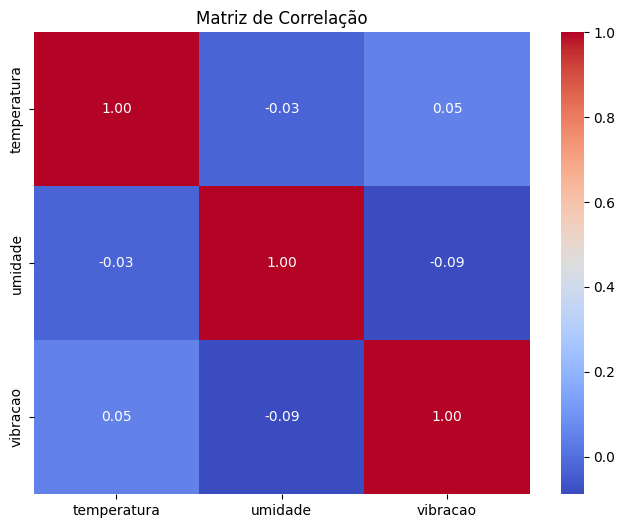

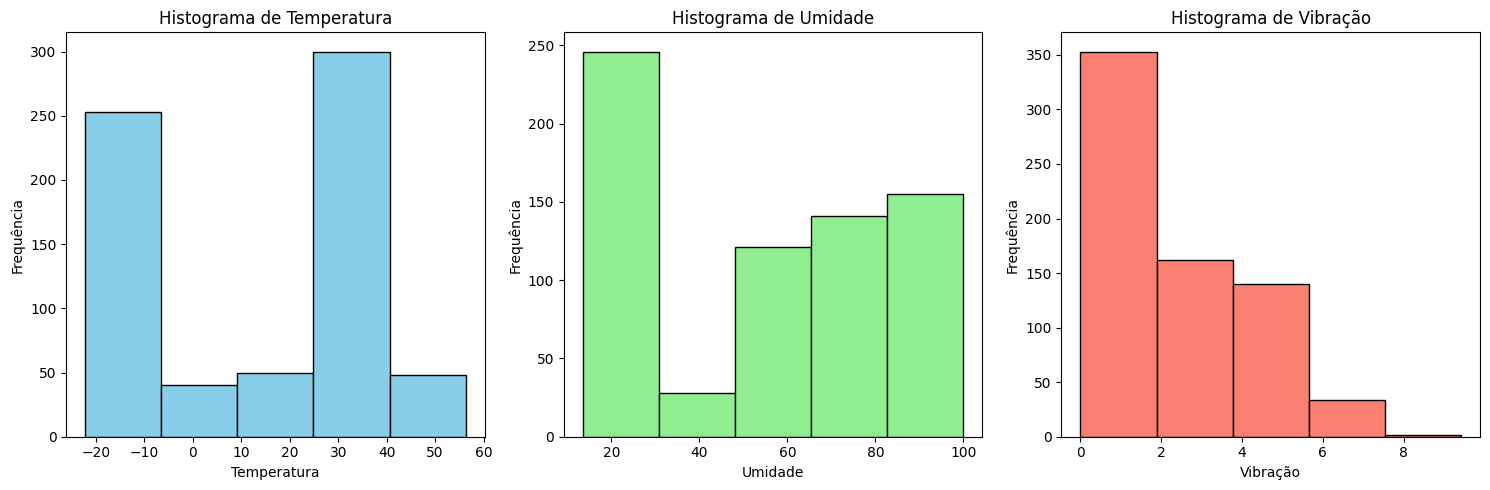

In [32]:
# Matriz de Correlação
correlation_matrix = df[['temperatura', 'umidade', 'vibracao']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.savefig('correlation_matrix.png')

# Histograma das variáveis numéricas
plt.figure(figsize=(15, 5))

# Histograma de Temperatura
plt.subplot(1, 3, 1)
plt.hist(df['temperatura'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histograma de Temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')

# Histograma de Umidade
plt.subplot(1, 3, 2)
plt.hist(df['umidade'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Histograma de Umidade')
plt.xlabel('Umidade')
plt.ylabel('Frequência')

# Histograma de Vibração
plt.subplot(1, 3, 3)
plt.hist(df['vibracao'], bins=5, color='salmon', edgecolor='black')
plt.title('Histograma de Vibração')
plt.xlabel('Vibração')
plt.ylabel('Frequência')

plt.tight_layout()
plt.savefig('histograms.png')

In [5]:
X = df.drop(columns=['status', "id"])
y = df['status']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do Modelo

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model_tree = DecisionTreeClassifier()
model_svm = SVC()
model_ada = AdaBoostClassifier()
model_log = LogisticRegression()
model_forest = RandomForestClassifier()

models = [model_tree, model_svm, model_ada, model_log, model_forest]

best_model = None
best_accuracy = 0

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("\n")

    if accuracy_score(y_test, y_pred) > best_accuracy:
        best_model = model
        best_accuracy = accuracy_score(y_test, y_pred)

print(f"Best model: {best_model.__class__.__name__}")
print(f"Best accuracy: {best_accuracy}")

Model: DecisionTreeClassifier
Accuracy: 1.0
              precision    recall  f1-score   support

      ALERTA       1.00      1.00      1.00        43
      NORMAL       1.00      1.00      1.00        40
      PERIGO       1.00      1.00      1.00        56

    accuracy                           1.00       139
   macro avg       1.00      1.00      1.00       139
weighted avg       1.00      1.00      1.00       139



Model: SVC
Accuracy: 0.5035971223021583
              precision    recall  f1-score   support

      ALERTA       0.53      0.40      0.45        43
      NORMAL       0.40      0.35      0.37        40
      PERIGO       0.54      0.70      0.61        56

    accuracy                           0.50       139
   macro avg       0.49      0.48      0.48       139
weighted avg       0.50      0.50      0.49       139



Model: AdaBoostClassifier
Accuracy: 0.4028776978417266
              precision    recall  f1-score   support

      ALERTA       0.34      1.00      0

/Users/daniel.lima/Documents/fiap/farm-predict/yield-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/daniel.lima/Documents/fiap/farm-predict/yield-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/daniel.lima/Documents/fiap/farm-predict/yield-env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to

In [18]:
best_model.score(X_test, y_test)

1.0

# Salvando modelo

In [40]:
pd.to_pickle(best_model, "best_model.pkl")